## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report
from message_ix.tools.add_dac import get_values

%matplotlib inline



<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


In [2]:
# SSPs and scenarios lists
ssps = ["SSP1","SSP2","SSP3","SSP4","SSP5"]
ssps = ["SSP1","SSP2","SSP5"]
# Parameters for CO2 injection rate scenarios
co2rates = {
    "co2rate1": 0.2,
    "co2rate2": 0.4,
    "co2rate3": 0.6,
    "co2rate4": 0.8,
    "co2rate5": 1.0,
        }
max_rate = 20000

# Parameters for DAC market penetration rate scenarios
mpens = {
    "mpen1": 0.050,
    "mpen2": 0.075,
    "mpen3": 0.100,
    "mpen4": 0.125,
    "mpen5": 0.150,
        }

# Parameters for CO2 storage availability scenarios
stors = {
    "stor1": 0.2,
    "stor2": 0.4,
    "stor3": 0.6,
    "stor4": 0.8,
    "stor5": 1.0,
        }

maxfco2storshares = {
    "maxfco2storshare1": 1.00, # max
    "maxfco2storshare2": 0.80, # max
    "maxfco2storshare3": 0.60, # max
    "maxfco2storshare4": 0.40, # max
    "maxfco2storshare5": 0.20, # max
}

minfco2storshares = {
    "minfco2storshare1": 0.10, # min
    "minfco2storshare2": 0.20, # min
    "minfco2storshare3": 0.30, # min
    "minfco2storshare4": 0.40, # min
    "minfco2storshare5": 0.50, # min
}

daccosts ={
    "daccost1":[1.00,0.97,0.96,0.94,0.93,0.92,0.91,0.91,0.90,0.90,0.90,0.90,0.90],
    "daccost2":[1.00,0.92,0.87,0.82,0.79,0.76,0.74,0.72,0.71,0.70,0.70,0.70,0.70],
    "daccost3":[1.00,0.87,0.79,0.70,0.64,0.59,0.56,0.54,0.51,0.51,0.51,0.50,0.50],
    "daccost4":[1.00,0.82,0.70,0.58,0.50,0.43,0.39,0.35,0.32,0.31,0.31,0.30,0.30],
    "daccost5":[1.00,0.77,0.61,0.46,0.36,0.27,0.22,0.16,0.13,0.11,0.11,0.10,0.10],
}

dacenergies ={
    "dacener1":[1.00,0.97,0.96,0.94,0.93,0.92,0.91,0.91,0.90,0.90,0.90,0.90,0.90],
    "dacener2":[1.00,0.92,0.87,0.82,0.79,0.76,0.74,0.72,0.71,0.70,0.70,0.70,0.70],
    "dacener3":[1.00,0.87,0.79,0.70,0.64,0.59,0.56,0.54,0.51,0.51,0.51,0.50,0.50],
    "dacener4":[1.00,0.82,0.70,0.58,0.50,0.43,0.39,0.35,0.32,0.31,0.31,0.30,0.30],
    "dacener5":[1.00,0.77,0.61,0.46,0.36,0.27,0.22,0.16,0.13,0.11,0.11,0.10,0.10],
}

scenariotec = ['dac_lt','dac_ht']
parameters = {
    "co2rates":co2rates, 
    "mpens":mpens, 
    "stors":stors, 
    "maxfco2storshares":maxfco2storshares, 
#    "minfco2storshares":minfco2storshares, 
#    "daccosts":daccosts,
#    "dacenergies":dacenergies
}

In [4]:
colors = {"SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}
lines = ["-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]


# Removal by DACCS

# Removal by FCCS

# Removal by BECCS

# CO2 Storage SSPs

# All SSP parameters

# No Min. Storage

# With Min fco2

# All SSPs no DAC

## No min storage

## With 50% min storage

# SSPs sensitivity

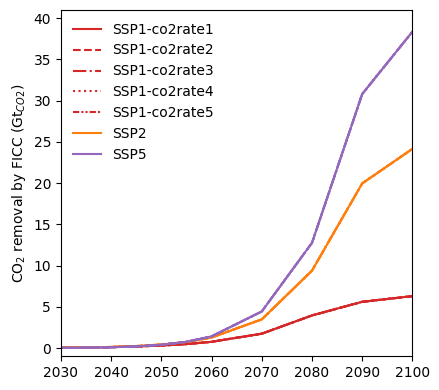

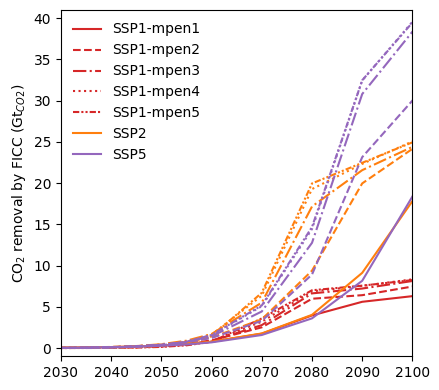

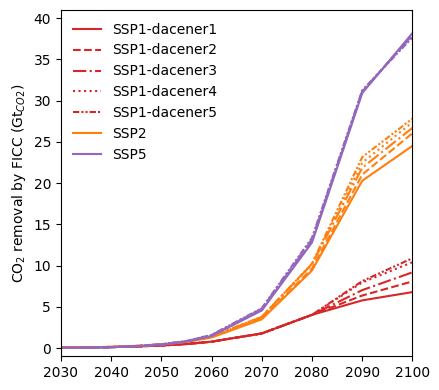

In [5]:
parameters = {
    "co2rates":co2rates, 
    "mpens":mpens, 
    "dacenergies":dacenergies
}

for par in list(parameters):
    mp = ixmp.Platform()

    scenarios = {f"SSP_dev_{ssp}_v0.1_dac": 
             {f"1000f_v0.13_dac_SSPpars-{parsc}": [] for parsc in parameters[par].keys()} 
             for ssp in ssps
            }

    for k,v in scenarios.items():
        for k1,v1 in v.items():
            scen = message_ix.Scenario(mp, model=k, scenario=k1)
            ccsrem = (scen.var("ACT",{"technology":"co2_tr_sd","mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.67).div(1000)
            ccsrem = ccsrem.groupby("year_act").sum()["lvl"]
            scenarios[k][k1] = ccsrem
    
    plt.figure(figsize=(4.5,4))
    for ssp in ssps:
        for p in range(len(parameters[par].keys())):
            model = f"SSP_dev_{ssp}_v0.1_dac"
            scenario = f"1000f_v0.13_dac_SSPpars-{list(parameters[par].keys())[p]}"

            if ssp == "SSP1":
                kwargs = {"label": f"{ssp}-{list(parameters[par].keys())[p]}"}
            elif ssp != "SSP1" and p == 0:
                kwargs = {"label": f"{ssp}"}
            else:
                kwargs = {}

            plt.plot(scenarios[model][scenario], ls=lines[p], c=colors[ssp], **kwargs)

    plt.xlim(2030,2100)
    plt.xticks(range(2030,2110,10))
    plt.ylim(-1,41)
    plt.yticks(range(0,45,5))

    plt.ylabel("CO$_2$ removal by FICC (Gt$_{CO2}$)")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.savefig(f"dac-ssp-sensitivities_{par}.jpeg",dpi=300)
    plt.show()

    mp.close_db()